In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics

Company: Name of the company manufacturing the bar.<br />

Bar_Name = The specific geo-region of origin for the bar.<br />

Ref: A value linked to when the review was entered in the database.<br />
 Higher = more recent.<br />

Review_Date: Date of publication of the review.<br />

Cocoa_Percent: Cocoa percentage (darkness) of the chocolate bar being reviewed.<br />

Location: Manufacturer base country.<br />

Rating:<br />

5= Elite (Transcending beyond the ordinary limits)  <br />
4= Premium (Superior flavor development, character and style)  <br />
3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)  <br />
2= Disappointing (Passable but contains at least one significant flaw)  <br />
1= Unpleasant (mostly unpalatable)<br />

Bean_type: The variety (breed) of bean used, if provided<br />

Origin: The broad geo-region of origin for the bean.<br />


In [95]:
data = pd.read_csv('../data_sets/flavors_of_cacao.csv')
data

,Company,Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


### Doel
Kunnen vorspelen wat de rating.

In [96]:
nummer = 0
for i in data.columns:
    print(data[i].isnull().values.any())
    print(i,"colum:", nummer )
    nummer = nummer + 1
    

False
Company colum: 0
False
Specific Bean Origin
or Bar Name colum: 1
False
REF colum: 2
False
Review
Date colum: 3
False
Cocoa
Percent colum: 4
False
Company
Location colum: 5
False
Rating colum: 6
True
Bean
Type colum: 7
True
Broad Bean
Origin colum: 8


we missen data in Bean  Type en Broad Bean  Origin

In [97]:
def fill_0(dataframe, list_of_columns):

    for column in list_of_columns:
        dataframe[column] = dataframe[column].replace(r'\s+', np.nan, regex=True)
        dataframe[column] = dataframe[column].fillna(0)

    return dataframe
# fill missing with 0
data.rename(columns ={"Review\nDate": "Review_Date"},inplace=True)
data.rename(columns ={"Broad Bean\nOrigin": "Origin"},inplace=True)
data.rename(columns ={"Bean\nType": "Type"},inplace=True)
data.rename(columns ={"Specific Bean Origin\nor Bar Name": "Bar_Name"},inplace=True)
data.rename(columns ={"Company\nLocation": "Location"},inplace=True)
data.rename(columns ={"Cocoa\nPercent": "Cocoa_Percent"},inplace=True)

emptylist = ['Origin','Type']
fill_0(data,emptylist)
data

,Company,Bar_Name,REF,Review_Date,Cocoa_Percent,Location,Rating,Type,Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,0,0
1,A. Morin,Kpime,1676,2015,70%,France,2.75,0,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,0,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,0,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,0,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,0,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,0,India


In [98]:
len(pd.unique(data['Location']))

60

We hebben nu all de missing data naar 0 gezet. Het leek me niet handing dan de mean of demedian te gebuiken.  
Veder gaan we all de namen om zeten naar cijvers.

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1795 non-null   object 
 1   Bar_Name       1795 non-null   object 
 2   REF            1795 non-null   int64  
 3   Review_Date    1795 non-null   int64  
 4   Cocoa_Percent  1795 non-null   object 
 5   Location       1795 non-null   object 
 6   Rating         1795 non-null   float64
 7   Type           1795 non-null   object 
 8   Origin         1795 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


ow no wo no we zie dat een paar dingen niet echt kunnen gebuiken laten we daar maar ff iets aan gaan doen.

In [100]:
data['Bar_Name']= pd.factorize(data.Bar_Name)[0]
data['Location']= pd.factorize(data.Location)[0]
data['Type']    = pd.factorize(data.Type)[0]
data['Origin']  = pd.factorize(data.Origin)[0]
data['Company'] = pd.factorize(data.Company)[0]



In [101]:
def clean_cocperc(l):
    fractions = l.split("%")
    return np.float32(fractions[0])
data.Cocoa_Percent = data.Cocoa_Percent.apply(lambda l: clean_cocperc(l))


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1795 non-null   int64  
 1   Bar_Name       1795 non-null   int64  
 2   REF            1795 non-null   int64  
 3   Review_Date    1795 non-null   int64  
 4   Cocoa_Percent  1795 non-null   float64
 5   Location       1795 non-null   int64  
 6   Rating         1795 non-null   float64
 7   Type           1795 non-null   int64  
 8   Origin         1795 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 126.3 KB


Rating is een float daar moeten we ff wat aan doen.

In [103]:
def map_to_rating(l):
    if l <= 2:
        return 1
    elif 2 < l <= 2.5:
        return 2
    elif 2.5 < l <= 3:
        return 3
    elif 3 < l <= 3.5:
        return 4
    elif 3.5 < l <= 3.75:
        return 5
    else:
        return 6
data["Rating"] = data.Rating.apply(lambda l: map_to_rating(l))

In [104]:
data["Rating"]

0       5
1       3
2       3
3       4
4       4
       ..
1790    5
1791    3
1792    4
1793    4
1794    3
Name: Rating, Length: 1795, dtype: int64

In [105]:
corr_matrix = data.corr()
print(corr_matrix["Rating"])

Company         -0.021822
Bar_Name         0.039230
REF              0.095008
Review_Date      0.093637
Cocoa_Percent   -0.143027
Location         0.013049
Rating           1.000000
Type             0.066519
Origin           0.015708
Name: Rating, dtype: float64


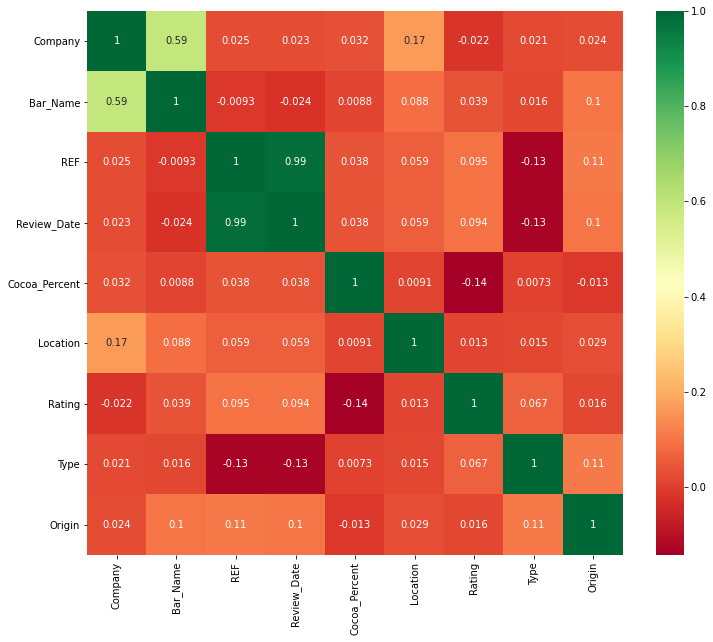

In [106]:
sns.heatmap(data[data.columns[:9]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

Een paar dingen die mij opvalen zijn review_date en REF dat dat 0.99 is geen idee waarom hier zo hoge corr voor staat.<br/>
De feature die ik ga gebruiken zijn: <br/>

- Cocoa_Percent -0.14 <br/>
- REF 0.095<br/>
- type 0.066<br/>

Met wet logica kunnen weten we dat ref bijna niks te maken heeft met de rating<br/>

In [107]:
data

,Company,Bar_Name,REF,Review_Date,Cocoa_Percent,Location,Rating,Type,Origin
0,0,0,1876,2016,63.0,0,5,0,0
1,0,1,1676,2015,70.0,0,3,0,1
2,0,2,1676,2015,70.0,0,3,0,1
3,0,3,1680,2015,70.0,0,4,0,1
4,0,4,1704,2015,70.0,0,4,0,2
...,...,...,...,...,...,...,...,...,...
1790,415,21,647,2011,70.0,48,5,0,2
1791,415,100,749,2011,65.0,48,3,3,26
1792,415,1037,749,2011,65.0,48,4,3,38
1793,415,1037,781,2011,62.0,48,4,0,38


In [108]:
import plotly.express as px
fig = px.scatter(x=data['Rating'], y=data['Cocoa_Percent'])

fig.show()

In [109]:
fig = px.scatter(data, x="Cocoa_Percent", y="Rating",color="Type"
                ,trendline='ols',
                 trendline_color_override='green')
fig.show()

In [110]:
count = data['Rating'].value_counts()
total=data.shape[0]
print(total)
count.div(total).mul(100)

1795


4    38.718663
3    33.426184
5    11.699164
2     7.855153
6     5.571031
1     2.729805
Name: Rating, dtype: float64

Hier kunnen we zien dat als we een model willen die niet alleen maar 4 zit te gokken.
Een hogeren acc hebben van 39%.

In [111]:
#feature matrix X
X = data.drop(['Rating'],axis= 1)
#target vector y
y = data['Rating']
print(y.shape)
X.shape

(1795,)


(1795, 8)

In [112]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(1436, 8) (1436,)
(359, 8) (359,)


In [113]:
model = KNeighborsClassifier()
model.fit(train_X,
          train_y.values.ravel())
prediction = model.predict(test_X)
resKNN = accuracy_score(test_y, prediction)
print('The accuracy of the KNN is', resKNN)
unique, counts = np.unique(prediction, return_counts=True)
print(unique)
print(counts)

The accuracy of the KNN is 0.37604456824512533
[1 2 3 4 5 6]
[ 11  25 151 154   7  11]


In [114]:
model = LogisticRegression()
model.fit(train_X, train_y.values.ravel())
prediction = model.predict(test_X)
resLog = accuracy_score(test_y, prediction)
print('The accuracy of the Logistic regression is', resLog)
unique, counts = np.unique(prediction, return_counts=True)
print(unique)
print(counts)

The accuracy of the Logistic regression is 0.415041782729805
[3 4]
[152 207]


c:\users\lawfulmonks pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [115]:
# duurt lang
#model = SVC(kernel ='linear')
#model.fit(train_X,train_y)
#prediction = model.predict(test_X)
#resSVC = accuracy_score(test_y, prediction)
#print('The accuracy of the SVC is',resSVC)
#unique, counts = np.unique(prediction, return_counts=True)
#print(unique)
#print(counts)
#The accuracy of the SVC is 0.4428969359331476
resSVC = 0.4428969359331476

In [116]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
tree = accuracy_score(test_y, prediction)
print('The accuracy of the tree is',tree)
unique, counts = np.unique(prediction, return_counts=True)
print(unique)
print(counts)

The accuracy of the tree is 0.3342618384401114
[1 2 3 4 5 6]
[ 10  25 110 133  55  26]


In [117]:

model = RandomForestClassifier()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
Forest = accuracy_score(test_y, prediction)
print('The accuracy of the Forest is',Forest)
unique, counts = np.unique(prediction, return_counts=True)
print(unique)
print(counts)

The accuracy of the Forest is 0.4178272980501393
[1 2 3 4 5 6]
[  4  12 127 188  14  14]


In [118]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(train_X,train_y.values.ravel())
prediction=model.predict(test_X)
resNB = accuracy_score(test_y, prediction)
print('The accuracy of the naive bayes is', resNB)
unique, counts = np.unique(prediction, return_counts=True)
print(unique)
print(counts)

The accuracy of the naive bayes is 0.4373259052924791
[1 2 3 4 5 6]
[ 21   1 104 209  10  14]


In [119]:
print('The accuracy of the naive bayes is', resNB)
print('The accuracy of the Forest is',Forest)
print('The accuracy of the tree is',tree)
print('The accuracy of the SVC is',resSVC)
print('The accuracy of the Logistic regression is', resLog)
print('The accuracy of the KNN is', resKNN)

The accuracy of the naive bayes is 0.4373259052924791
The accuracy of the Forest is 0.4178272980501393
The accuracy of the tree is 0.3342618384401114
The accuracy of the SVC is 0.4428969359331476
The accuracy of the Logistic regression is 0.415041782729805
The accuracy of the KNN is 0.37604456824512533


We hebben 3 model die hoger dan 39% scoren. Het is geen wonder dat naive bayes het best ok doen
zeker als we kijken naar de rest

In [120]:
#feature matrix X
X = data[['Cocoa_Percent','REF','Type']]
#target vector y
y = data['Rating']
print(y.shape)
X.shape

(1795,)


(1795, 3)

In [121]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(1436, 3) (1436,)
(359, 3) (359,)


In [122]:
model = KNeighborsClassifier()
model.fit(train_X,
          train_y.values.ravel())
prediction = model.predict(test_X)
resKNN = accuracy_score(test_y, prediction)
print('The accuracy of the KNN is', resKNN)
unique, counts = np.unique(prediction, return_counts=True)
print(unique)
print(counts)

The accuracy of the KNN is 0.4011142061281337
[1 2 3 4 5 6]
[  8  18 150 152  20  11]


In [123]:
model = LogisticRegression()
model.fit(train_X, train_y.values.ravel())
prediction = model.predict(test_X)
resLog = accuracy_score(test_y, prediction)
print('The accuracy of the Logistic regression is', resLog)
unique, counts = np.unique(prediction, return_counts=True)
print(unique)
print(counts)

The accuracy of the Logistic regression is 0.45403899721448465
[3 4]
[145 214]


c:\users\lawfulmonks pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [124]:
#model = SVC(kernel ='linear')
#model.fit(train_X,train_y)
#prediction = model.predict(test_X)
#resSVC = accuracy_score(test_y, prediction)
#print('The accuracy of the SVC is',resSVC)
#unique, counts = np.unique(prediction, return_counts=True)
#print(unique)
#print(counts)
#The accuracy of the SVC is 0.44846796657381616
#[3 4]
#[151 208]
# output om dat deze super lang duurt
resSVC = 0.44846796657381616

In [125]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
tree = accuracy_score(test_y, prediction)
print('The accuracy of the tree is',tree)
unique, counts = np.unique(prediction, return_counts=True)
print(unique)
print(counts)

The accuracy of the tree is 0.35376044568245124
[1 2 3 4 5 6]
[ 11  26 133 136  29  24]


In [126]:
model = RandomForestClassifier()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
Forest = accuracy_score(test_y, prediction)
print('The accuracy of the Forest is',Forest)
unique, counts = np.unique(prediction, return_counts=True)
print(unique)
print(counts)

The accuracy of the Forest is 0.3649025069637883
[1 2 3 4 5 6]
[  5  20 126 142  42  24]


In [127]:
model=GaussianNB()
model.fit(train_X,train_y.values.ravel())
prediction=model.predict(test_X)
resNB = accuracy_score(test_y, prediction)
print('The accuracy of the naive bayes is', resNB)
unique, counts = np.unique(prediction, return_counts=True)
print(unique)
print(counts)

The accuracy of the naive bayes is 0.43175487465181056
[1 3 4 5]
[  9 119 222   9]


In [128]:
print('The accuracy of the naive bayes is', resNB)
print('The accuracy of the Forest is',Forest)
print('The accuracy of the tree is',tree)
print('The accuracy of the SVC is',resSVC)
print('The accuracy of the Logistic regression is', resLog)
print('The accuracy of the KNN is', resKNN)

The accuracy of the naive bayes is 0.43175487465181056
The accuracy of the Forest is 0.3649025069637883
The accuracy of the tree is 0.35376044568245124
The accuracy of the SVC is 0.44846796657381616
The accuracy of the Logistic regression is 0.45403899721448465
The accuracy of the KNN is 0.4011142061281337


### Conculsie <br/>
Iets dat mij opvalt bij de predictions bij de hogeren scores dat ze logistic regression
alleen maar 3 en 4 probeeren in tevullen dit is niet zo raar om dat deze model meestal good worden gebruikt voor 1 of 0
maar 3 en 4 nemen meer dan 70% van de data dus het is niet raar dat ze het besten werken.
Veder zien we wel een verschil tussen all de data en beperkten data met een hoge corr.
Zo als ik had verwacht zou het niet beter gaan doen om dat dit model ook goed werkt met veel data.
Wat me wel opvalt is dat forest minder goed werk met corr data.Dit komt ook daar dat zelft met all de data dat het niet verzelijk veel is dus fortest kan ook goed
tegen column.

Ten afsluiten Hoe zouden we dit beter kunnen doen ten eersten niet 49% van bean soort missen.
Nu heb ik hier gewoon 0 voor in gevult maar dit is alles behavlen een goeden oplosing.
